In [1]:
!python -m pip install multiple-hypothesis-testing

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [3]:
from Higher_Criticism import Higher_Criticism, Benjamini_Hochberg, Bonferroni, Lowest_Angle, Berk_Jones, Extreme_P_Values_Discovery_Method
from Higher_Analysis import Monte_carlo_Confusion_Matrices, display_simulation_results
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator


In [4]:
import numpy as np

N=3000
monte_carlo = 1000
chunk_size = 100
beta_range=list(np.arange(0.5,1.0,0.1))
r_range=list(np.arange(0.0,1.05,0.05))
gamma_range = [0.3, -0.5, 'logsqrt']
extra_title = f'    Model Size = {N}  monte_carlo={monte_carlo}'
params_list = Data_Generator.params_list_from_N_r_beta(N=N, r=r_range, beta=beta_range)
signal_generators = [Data_Generator(**params) for params in params_list]

major_models = [Higher_Criticism(gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Lowest_Angle(gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin),\
                Berk_Jones(gamma=gamma_range, selection_method=Extreme_P_Values_Discovery_Method.Selection_Method_ArgMin)]


In [5]:
confusion_matrices = Monte_carlo_Confusion_Matrices(\
    hc_models=major_models, signal_generators=signal_generators,\
    monte_carlo=monte_carlo, chunk_size=chunk_size)


100%|██████████| 105000/105000 [03:55<00:00, 446.61it/s]


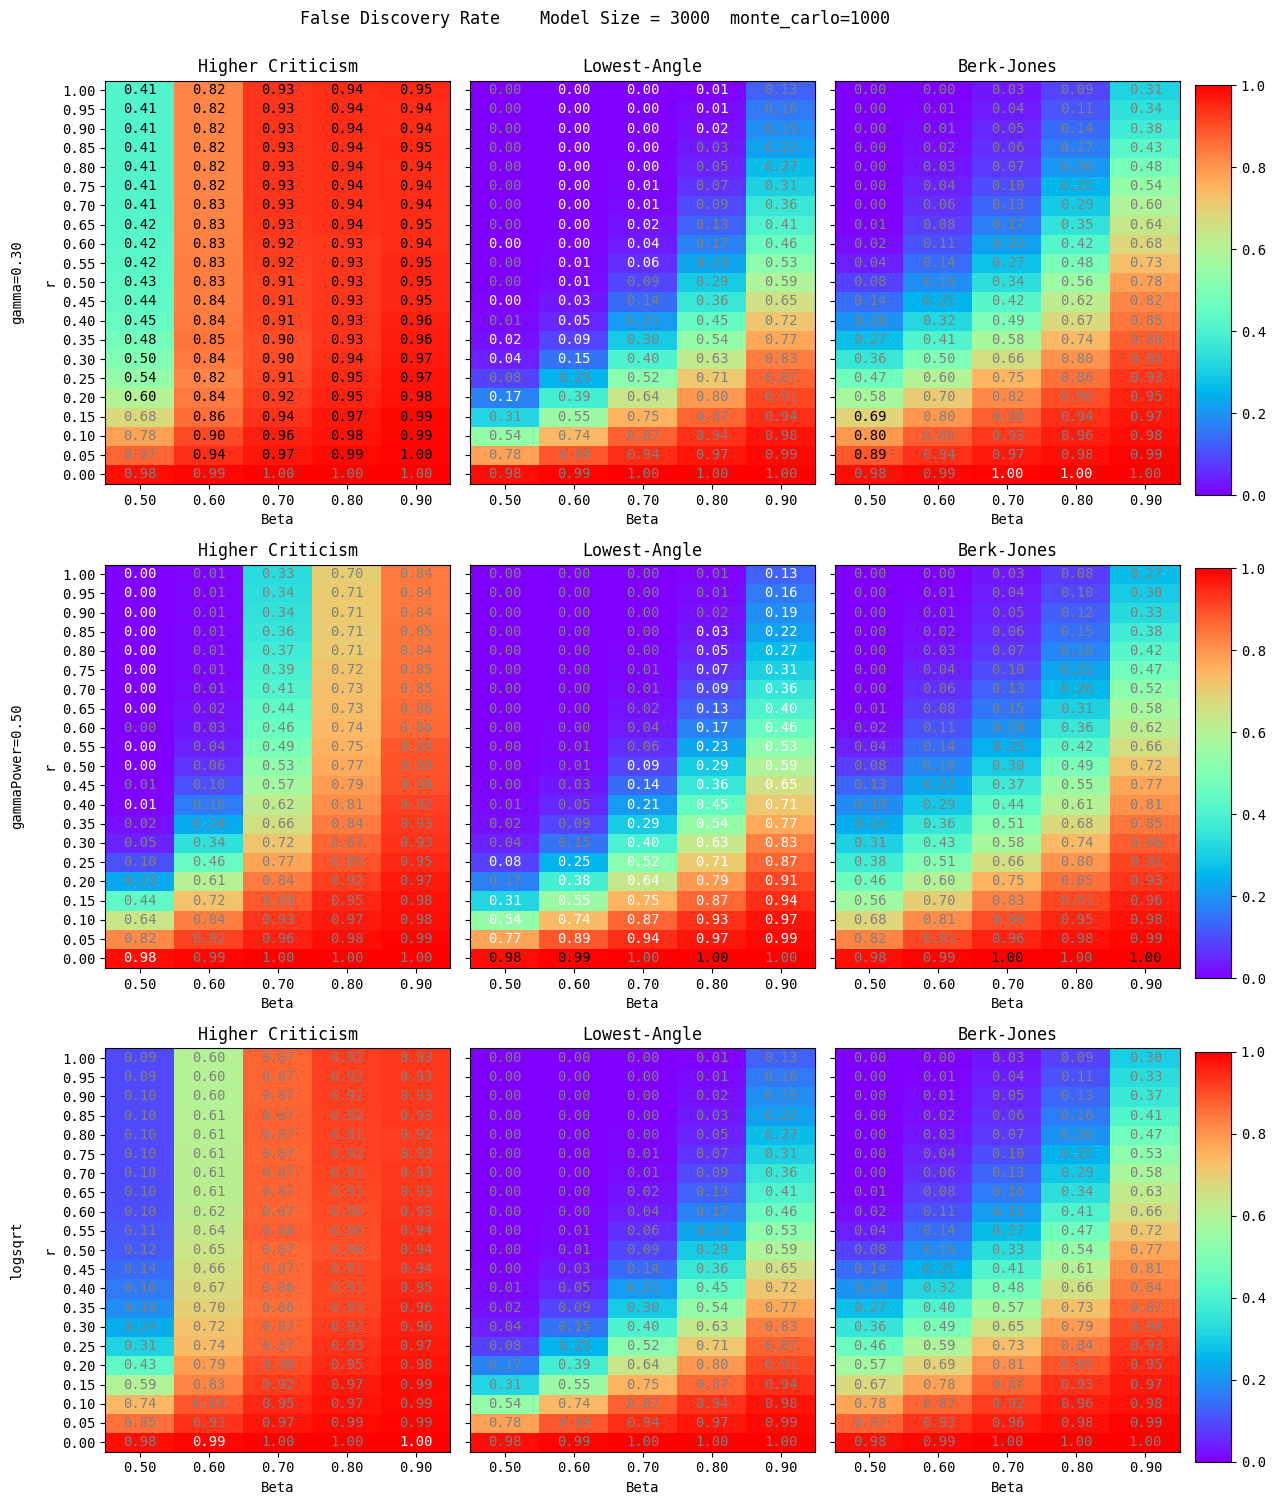

In [6]:
fdr_all = confusion_matrices.apply_mean_false_disovery_rate()
display_simulation_results(suptitle='False Discovery Rate' + extra_title,\
                           simulation_results=fdr_all, major_models=major_models,\
                            r_range=r_range, beta_range=beta_range, vmin=0.0, vmax=1.0)


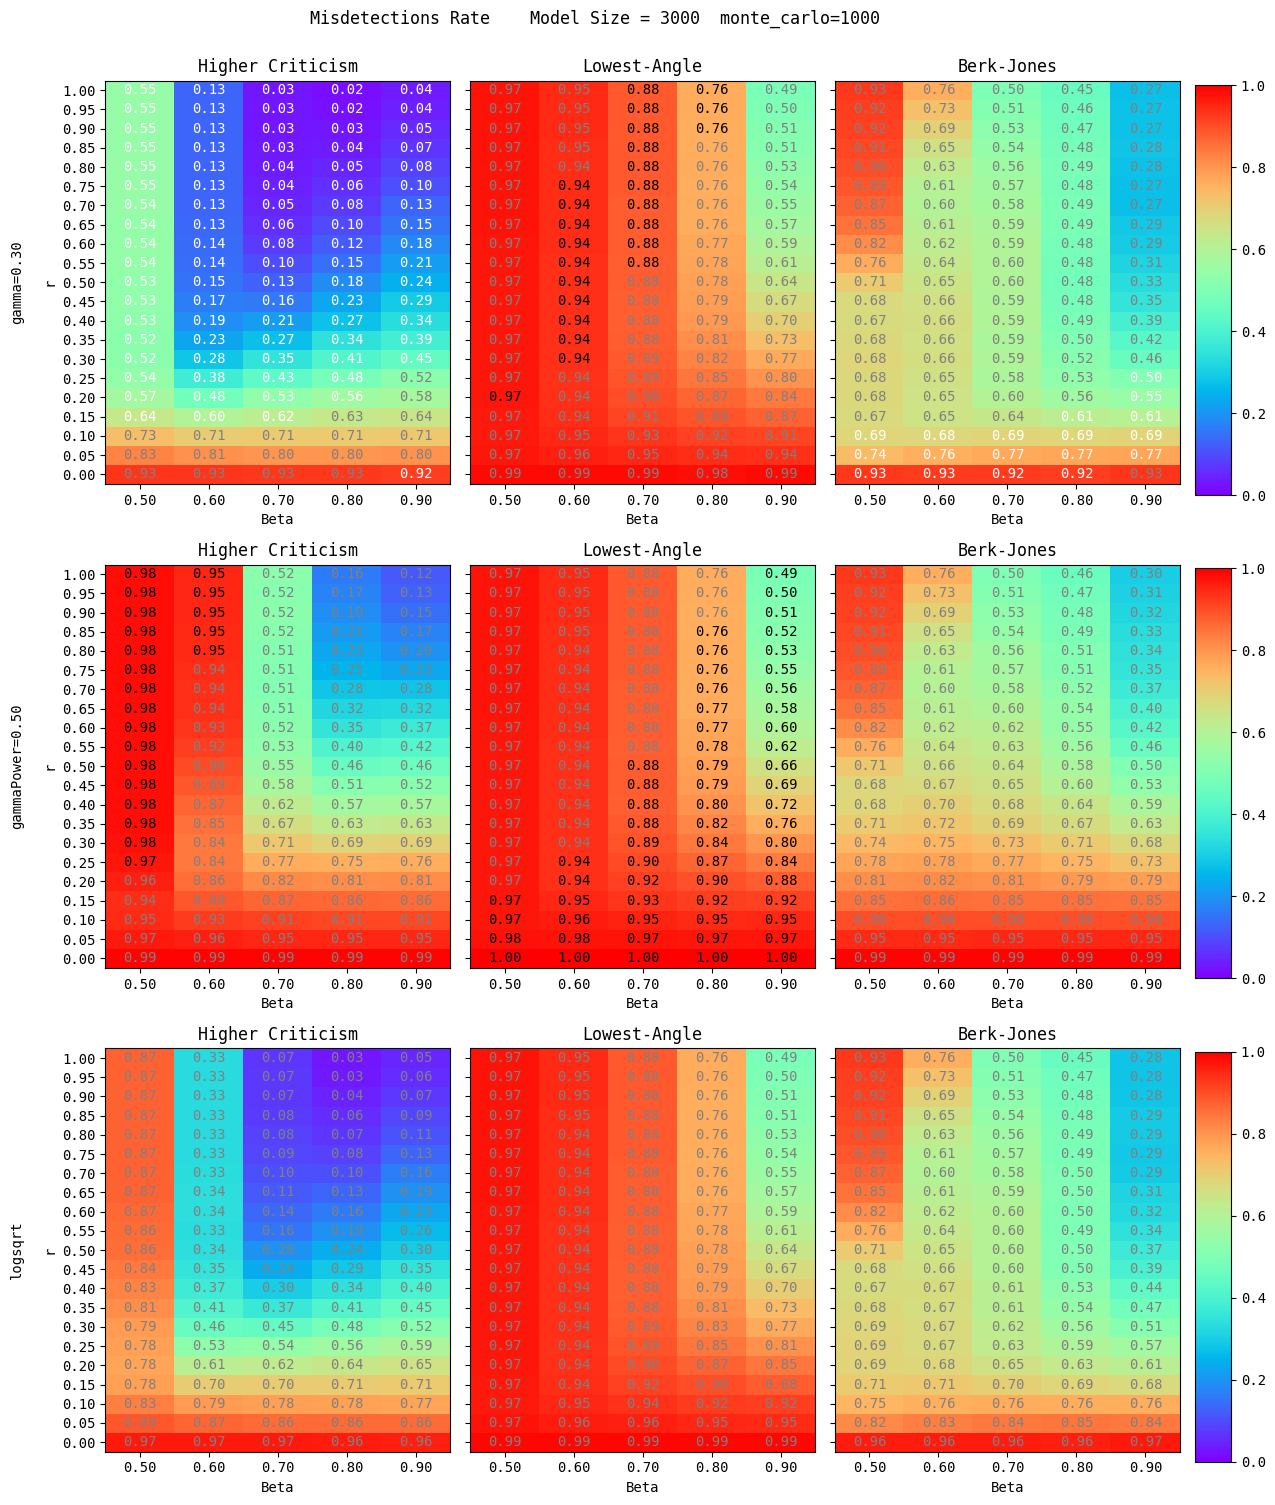

In [7]:
mdr_all = confusion_matrices.apply_mean_misdetection_rate()
display_simulation_results(suptitle='Misdetections Rate' + extra_title,\
                           simulation_results=mdr_all, major_models=major_models,\
                            r_range=r_range, beta_range=beta_range, vmin=0.0, vmax=1.0)


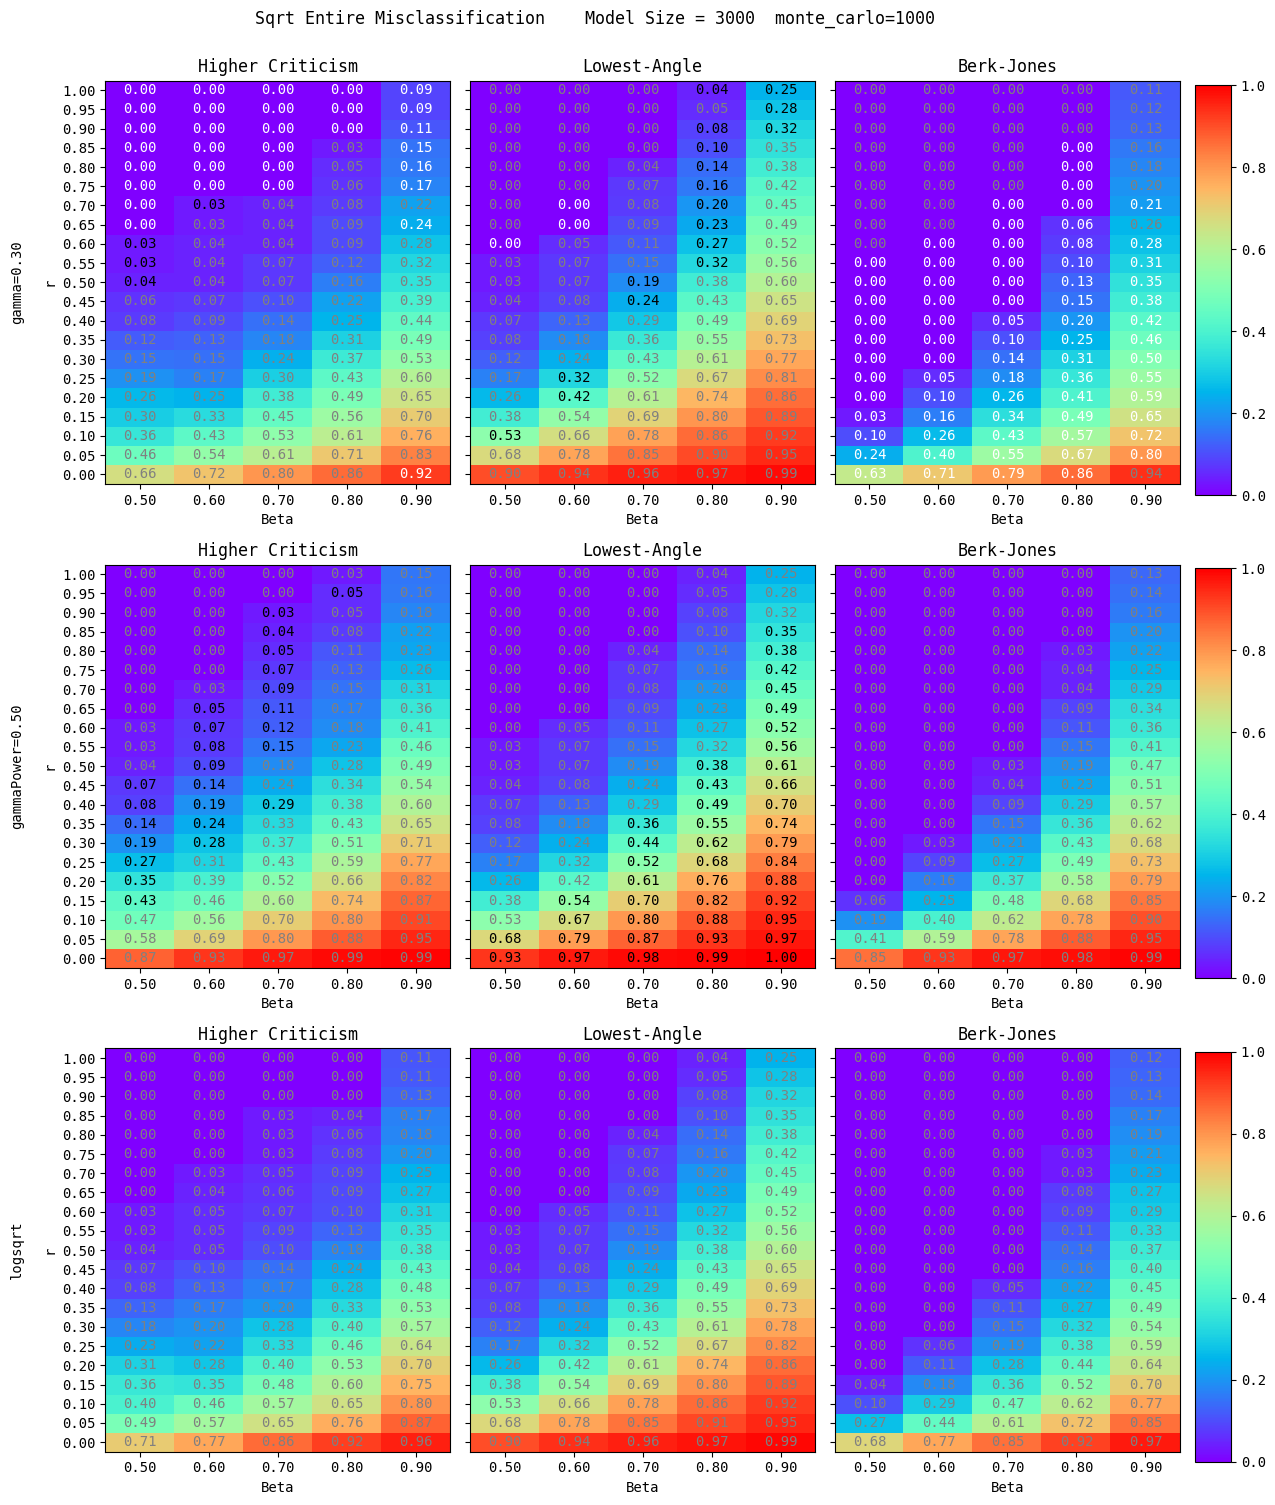

In [8]:
mcr_all = confusion_matrices.apply_sqrt_mean_entire_misclassification_rate()
display_simulation_results(suptitle='Sqrt Entire Misclassification' + extra_title,\
                           simulation_results=mcr_all, major_models=major_models,\
                            r_range=r_range, beta_range=beta_range, vmin=0.0, vmax=1.0)


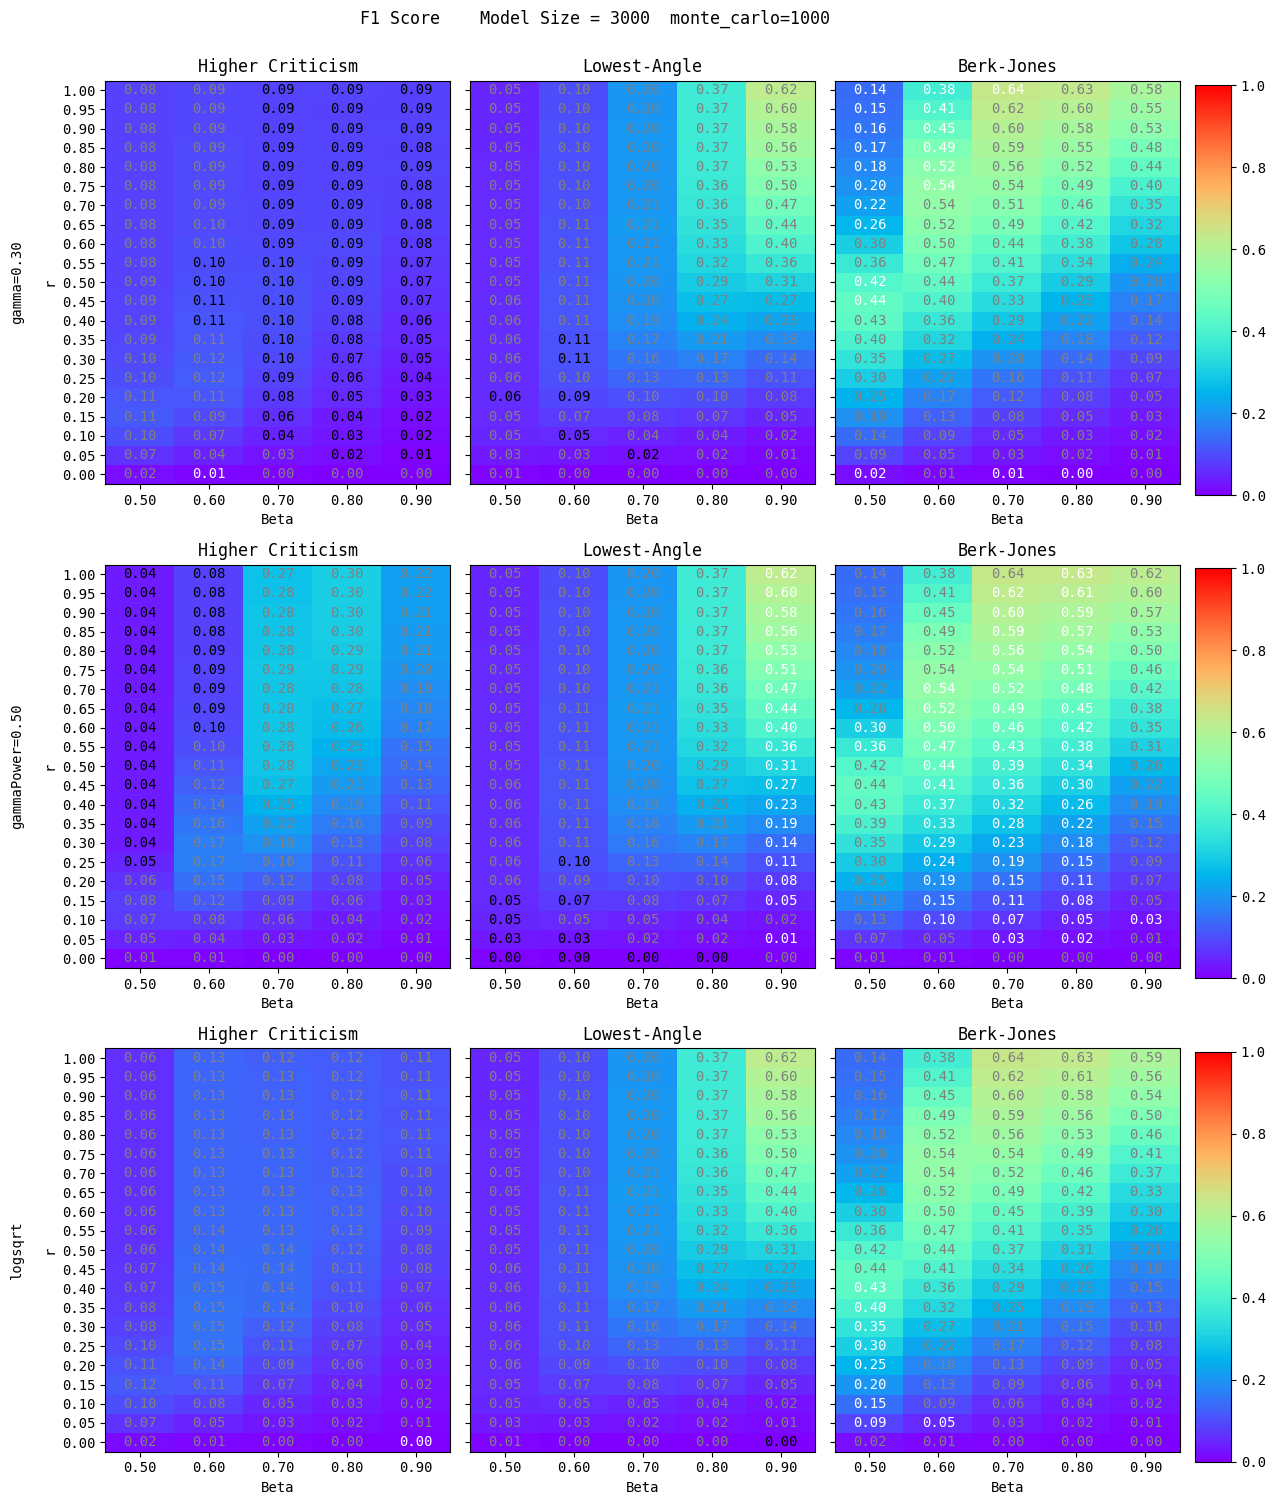

In [9]:
f1_score_all = confusion_matrices.apply_mean_f1_score()
display_simulation_results(suptitle='F1 Score' + extra_title,\
                           simulation_results=f1_score_all, major_models=major_models,\
                            r_range=r_range, beta_range=beta_range, vmin=0.0, vmax=1.0,\
                                min_color='black', max_color='white')
